# ソースコード

In [1]:
import numpy as np
import pandas as pd
from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt
import japanize_matplotlib
%matplotlib inline

from io import BytesIO
from PIL import Image
from mpl_toolkits.mplot3d import Axes3D

from tqdm import tqdm_notebook as tqdm

import warnings
warnings.filterwarnings('ignore')

In [2]:
def is_positive_definite(A):
    for i in range(len(A)):
        if np.linalg.det(A[:i+1,:i+1])<=0:
            return False
    return True

In [3]:
def cholesky(A):
    if is_positive_definite(cov)==False:
        return "正定値ではありません"
    
    L = [[0.0] * len(A) for _ in range(len(A))]
    for i, (Ai, Li) in enumerate(zip(A, L)):
        for j, Lj in enumerate(L[:i+1]):
            s = sum(Li[k] * Lj[k] for k in range(j))
            Li[j] = np.sqrt(Ai[i] - s) if (i == j) else (1.0 / Lj[j] * (Ai[j] - s))
    return np.array(L)

In [4]:
def make_random(mu, cov, n):
    dim = len(cov)
    if is_positive_definite(cov)==False:
        return "正定値ではありません"
    
    L = cholesky(cov)
    
    random_list=[]
    
    for i in tqdm(range(n)):
        z = np.random.randn(dim,1)
        random_list.append((np.dot(L,z)+mu).reshape(1,-1).tolist()[0])
                            
    return np.array(random_list)

# 2次元正規分布

In [5]:
mu = np.array([[2],
                            [3]])

cov = np.array([[1,0.2],
                            [0.2,1]])

In [6]:
cholesky(cov)

array([[1.       , 0.       ],
       [0.2      , 0.9797959]])

In [7]:
x = make_random(mu, cov, 100000)

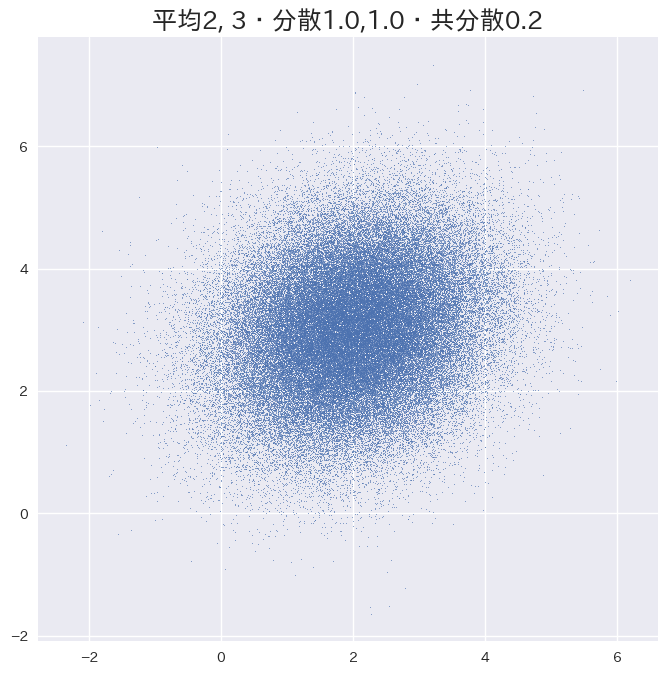

In [8]:
plt.figure(figsize=(8,8),dpi=100)
plt.title(f"平均{round(mu[0,0],2)}, {round(mu[1,0],2)}・分散{round(cov[0,0],2)},{round(cov[1,1],2)}・共分散{round(cov[0,1],2)}", fontsize=18)
plt.scatter(x[:,0],x[:,1],s=0.1)
plt.savefig("norm_dist1.png")
plt.show()

In [9]:
mu = np.array([[-5],
                            [5]])

cov = np.array([[10,0.5],
                            [0.5,0.1]])

In [10]:
cholesky(cov)

array([[3.16227766, 0.        ],
       [0.15811388, 0.27386128]])

In [11]:
x = make_random(mu, cov, 100000)

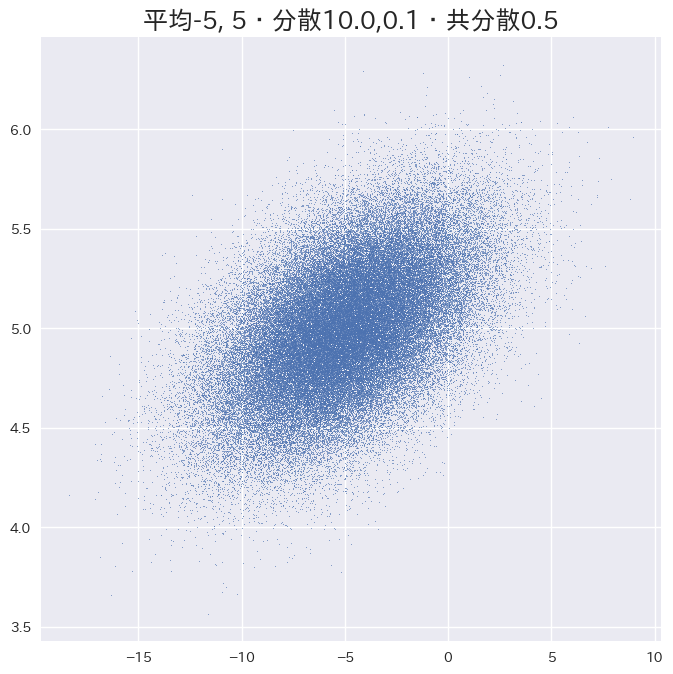

In [12]:
plt.figure(figsize=(8,8),dpi=100)
plt.title(f"平均{round(mu[0,0],2)}, {round(mu[1,0],2)}・分散{round(cov[0,0],2)},{round(cov[1,1],2)}・共分散{round(cov[0,1],2)}", fontsize=18)
plt.scatter(x[:,0],x[:,1],s=0.1)
plt.savefig("norm_dist2.png")
plt.show()

In [13]:
mu = np.array([[0],
                            [0]])

cov = np.array([[10,-0.5],
                            [-0.5,0.1]])

In [14]:
cholesky(cov)

array([[ 3.16227766,  0.        ],
       [-0.15811388,  0.27386128]])

In [15]:
x = make_random(mu, cov, 100000)

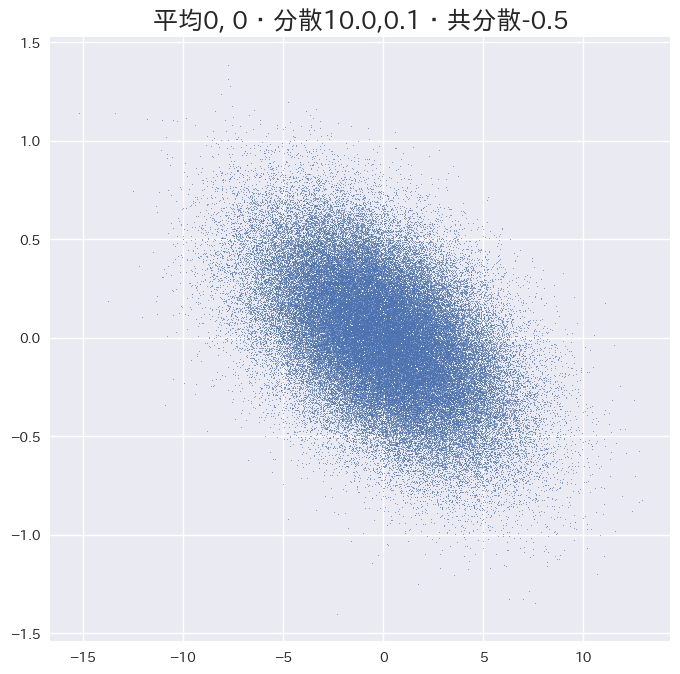

In [16]:
plt.figure(figsize=(8,8),dpi=100)
plt.title(f"平均{round(mu[0,0],2)}, {round(mu[1,0],2)}・分散{round(cov[0,0],2)},{round(cov[1,1],2)}・共分散{round(cov[0,1],2)}", fontsize=18)
plt.scatter(x[:,0],x[:,1],s=0.1)
plt.savefig("norm_dist3.png")
plt.show()

In [17]:
mu = np.array([[0],
                            [0]])

cov = np.array([[1.0,0.9],
                            [0.9,1]])

In [18]:
cholesky(cov)

array([[1.        , 0.        ],
       [0.9       , 0.43588989]])

In [19]:
x = make_random(mu, cov, 100000)

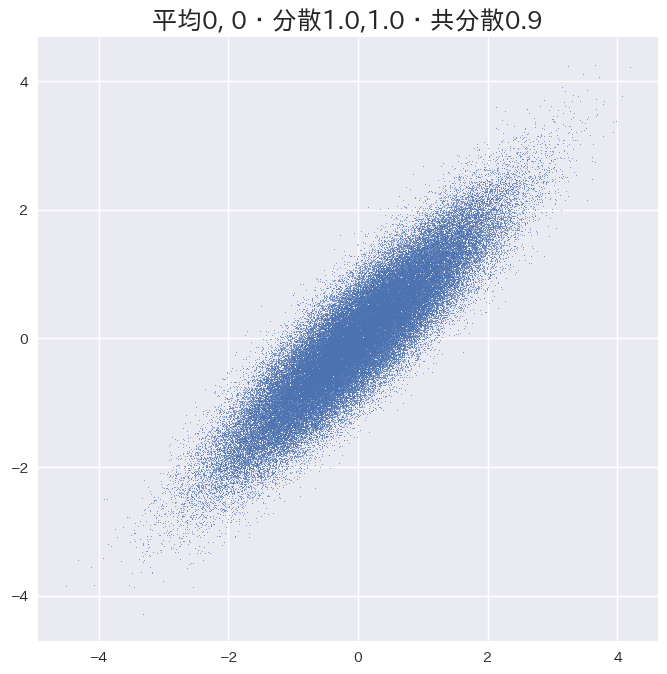

In [20]:
plt.figure(figsize=(8,8),dpi=100)
plt.title(f"平均{round(mu[0,0],2)}, {round(mu[1,0],2)}・分散{round(cov[0,0],2)},{round(cov[1,1],2)}・共分散{round(cov[0,1],2)}", fontsize=18)
plt.scatter(x[:,0],x[:,1],s=0.1)
plt.savefig("norm_dist4.png")
plt.show()

In [21]:
cov = np.array([[0.1,0.5],
                            [0.5,0.1]])

In [22]:
cholesky(cov)

'正定値ではありません'

# n次元正規分布

In [23]:
dim=10

In [44]:
mu = np.random.normal(0,0,(dim,1))

cov = np.random.randint(-2,2,(dim,dim))
cov = np.dot(cov.T,cov)

In [45]:
np.round(mu.T,1)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [46]:
pd.DataFrame(np.round(cov,1))

,0,1,2,3,4,5,6,7,8,9
0,19,9,6,0,7,3,2,2,-6,6
1,9,15,-2,-1,9,4,-5,5,2,7
2,6,-2,14,2,5,0,1,3,-7,-3
3,0,-1,2,18,6,10,5,-6,-3,1
4,7,9,5,6,21,4,8,-2,0,11
5,3,4,0,10,4,14,1,2,-1,-2
6,2,-5,1,5,8,1,22,-7,0,7
7,2,5,3,-6,-2,2,-7,15,-1,-5
8,-6,2,-7,-3,0,-1,0,-1,12,3
9,6,7,-3,1,11,-2,7,-5,3,13


In [47]:
pd.DataFrame(np.round(cholesky(cov),2))

,0,1,2,3,4,5,6,7,8,9
0,4.36,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,2.06,3.28,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,1.38,-1.48,3.15,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,-0.31,0.49,4.20,0.00,0.00,0.00,0.00,0.00,0.00
4,1.61,1.73,1.70,1.35,3.27,0.00,0.00,0.00,0.00,0.00
5,0.69,0.79,0.07,2.43,-0.57,2.58,0.00,0.00,0.00,0.00
6,0.46,-1.82,-0.73,1.14,3.09,0.45,2.62,0.00,0.00,0.00
7,0.46,1.24,1.33,-1.49,-1.57,1.30,0.76,2.13,0.00,0.00
8,-1.38,1.48,-0.93,-0.50,0.58,0.15,0.51,-0.65,2.40,0.00
9,1.38,1.27,-0.96,0.44,2.33,-1.40,0.34,-0.03,0.42,0.83


In [48]:
x = make_random(mu, cov, 100000)

In [49]:
df = pd.DataFrame(x)

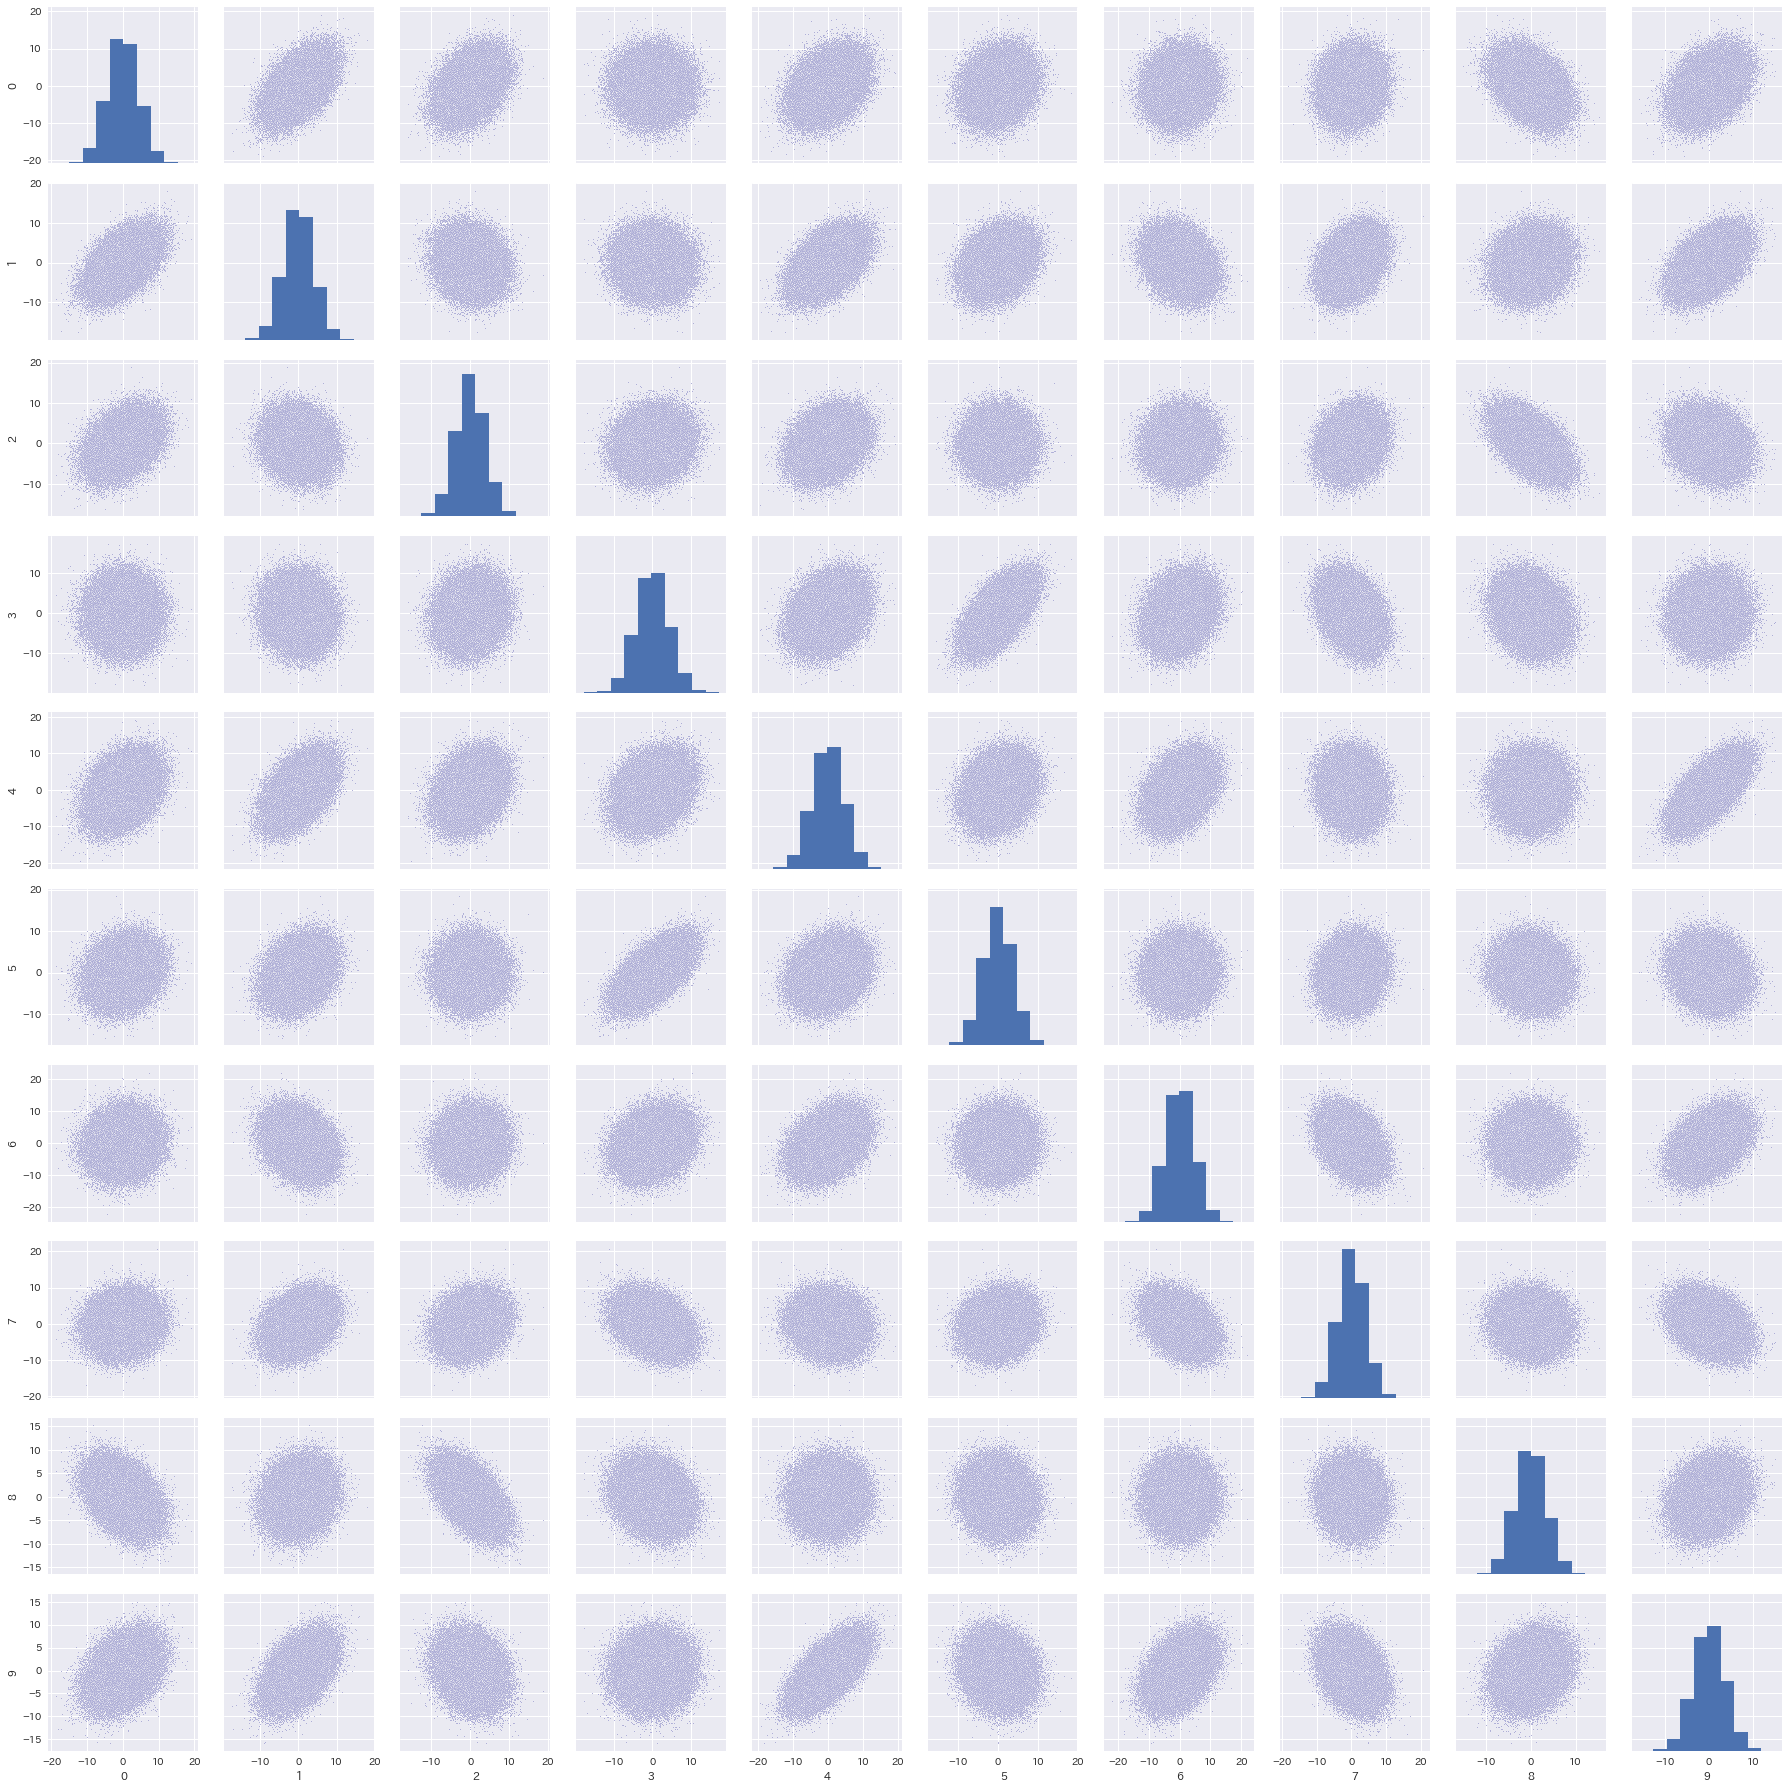

In [50]:
plt.figure(figsize=(10,10),dpi=100)
g=sns.pairplot(df, plot_kws={"s": 1,"color":"navy"})
plt.savefig(f"norm_dist10.png")

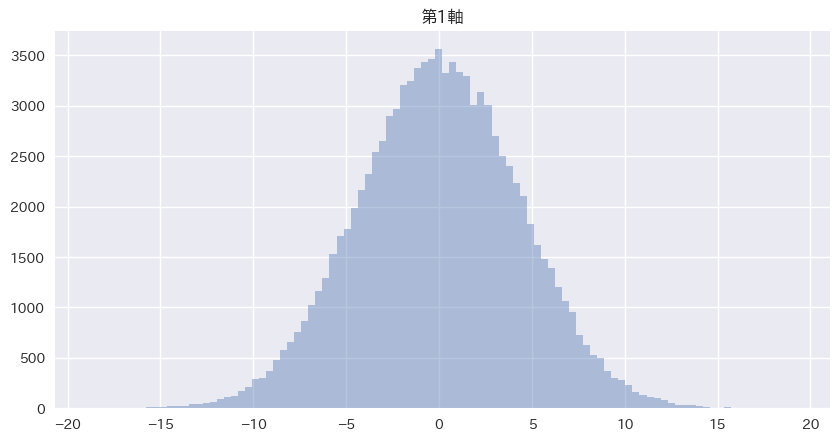

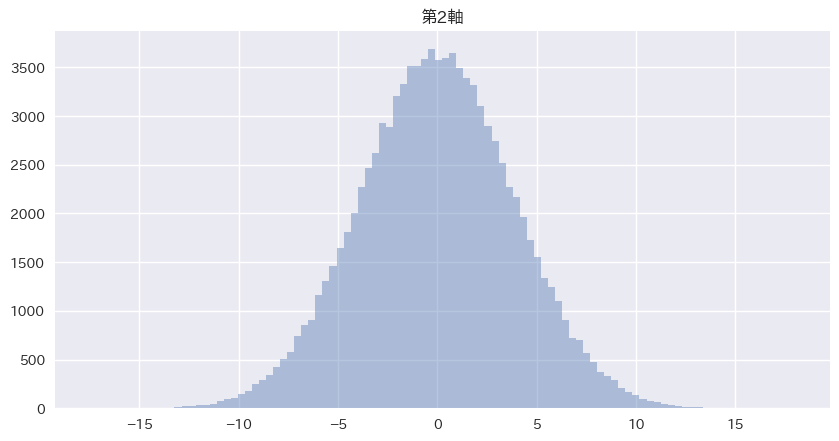

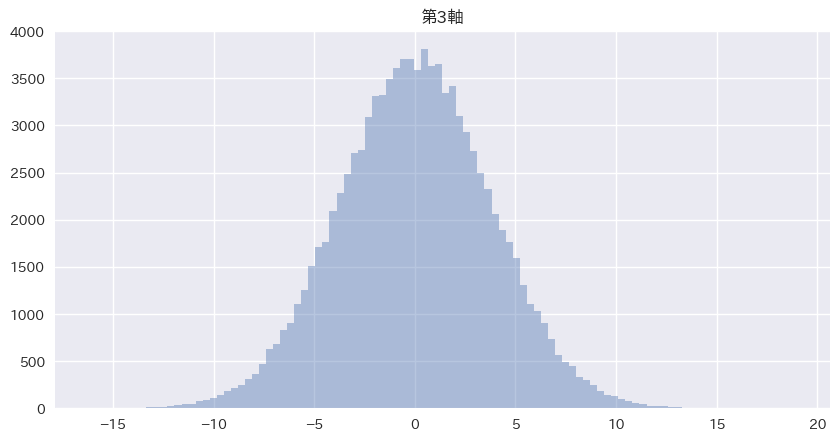

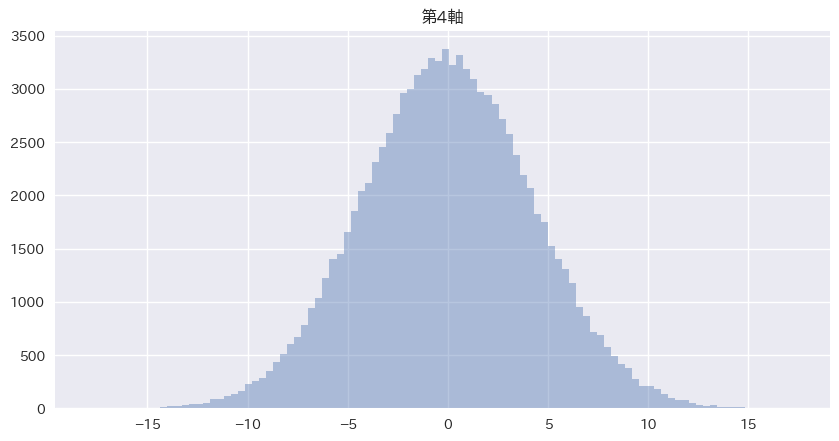

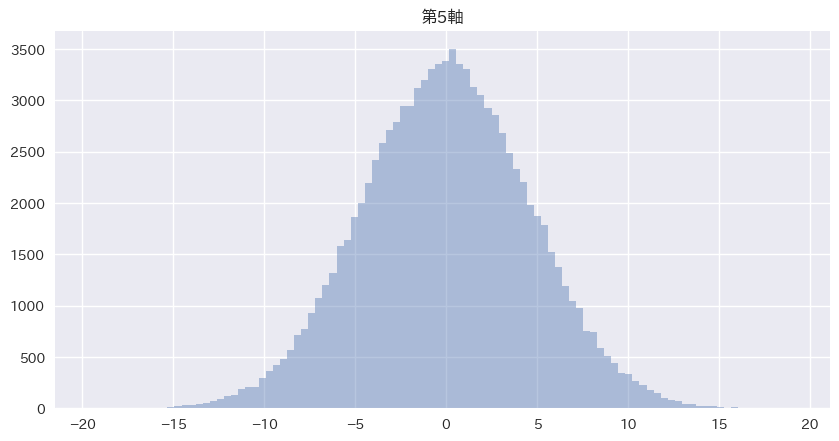

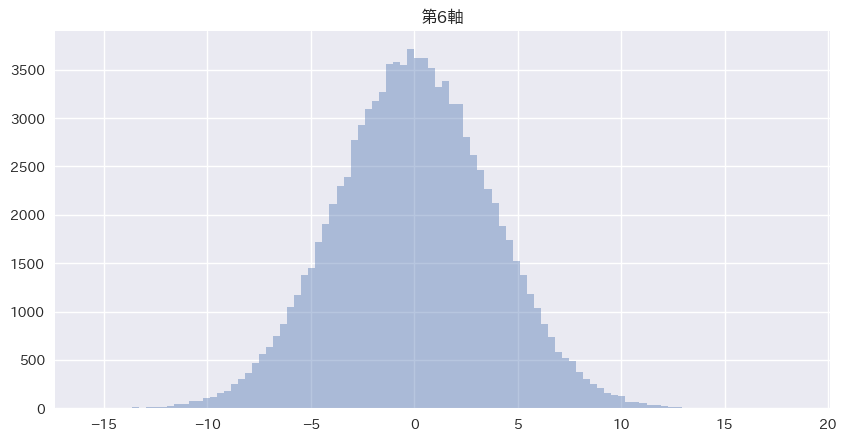

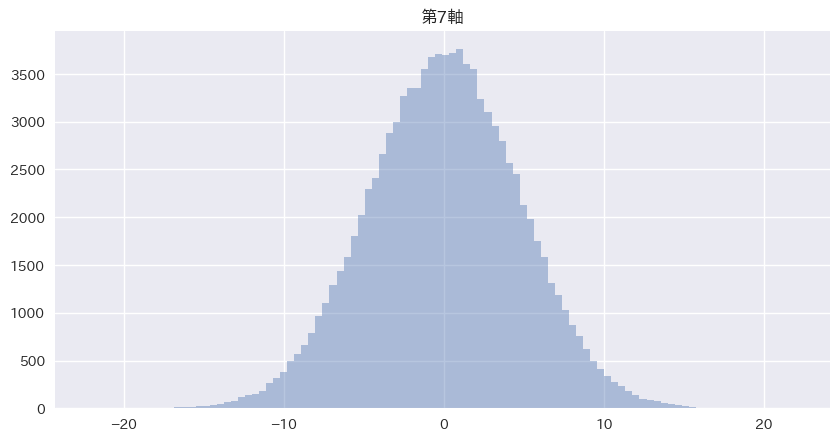

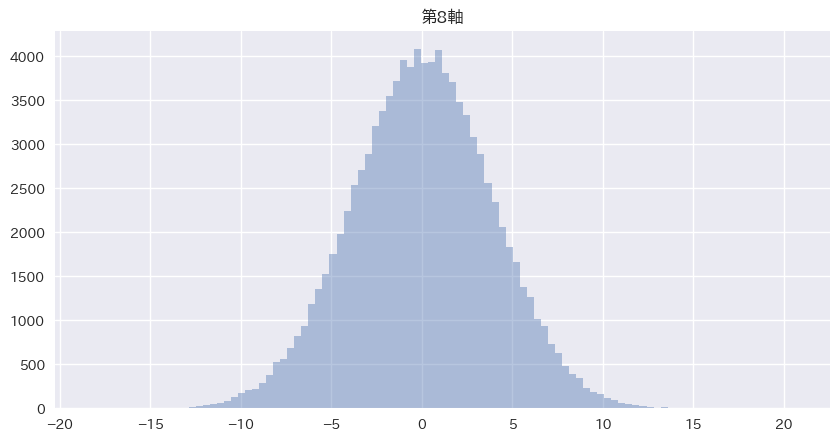

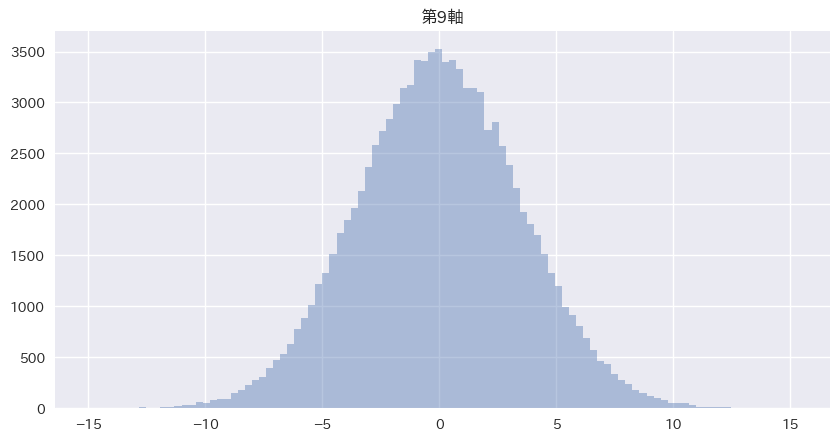

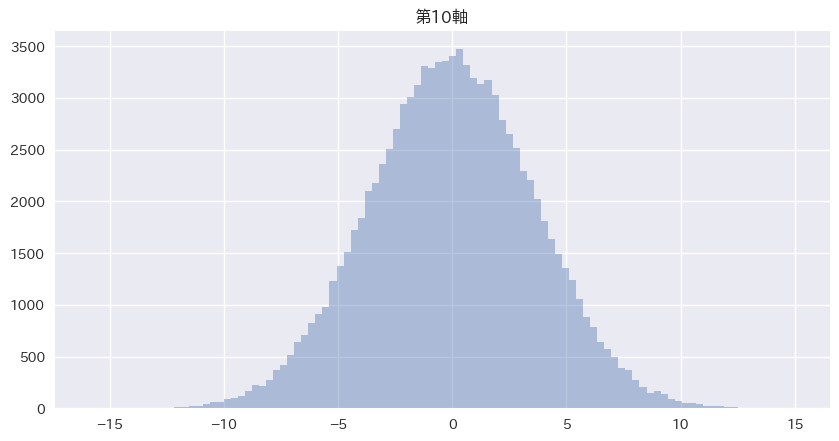

In [51]:
for i in range(dim):
    plt.figure(figsize=(10,5),dpi=100)
    plt.title(f"第{i+1}軸")
    sns.distplot(x[:,i], kde=False, rug=False,bins=100) 
    plt.savefig(f"norm_dist10_{i+1}.png")